In [3]:
# Importamos DuckDB

import duckdb

# SQL Queries

In [4]:
duckdb.sql("SELECT 42").show()

┌───────┐
│  42   │
│ int32 │
├───────┤
│    42 │
└───────┘



## DuckDB as Pandas DataFrame

In [5]:
df = duckdb.sql("SELECT 42").df()
df

,42
0,42


## DuckDB + Polars

```bash
pip install duckdb
pip install -U 'polars[pyarrow]'
```

In [6]:
import polars as pl

In [7]:
df = pl.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "fruits": ["banana", "banana", "apple", "apple", "banana"],
        "B": [5, 4, 3, 2, 1],
        "cars": ["beetle", "audi", "beetle", "beetle", "beetle"],
    }
)

In [8]:
duckdb.sql('SELECT * FROM df').show()

┌───────┬─────────┬───────┬─────────┐
│   A   │ fruits  │   B   │  cars   │
│ int64 │ varchar │ int64 │ varchar │
├───────┼─────────┼───────┼─────────┤
│     1 │ banana  │     5 │ beetle  │
│     2 │ banana  │     4 │ audi    │
│     3 │ apple   │     3 │ beetle  │
│     4 │ apple   │     2 │ beetle  │
│     5 │ banana  │     1 │ beetle  │
└───────┴─────────┴───────┴─────────┘



In [9]:
# DuckDB a Polars
df = duckdb.sql("""
SELECT 1 AS id, 'banana' AS fruit
UNION ALL
SELECT 2, 'apple'
UNION ALL
SELECT 3, 'mango'""").pl()

In [10]:
df

id,fruit
i32,str
1,"""banana"""
2,"""apple"""
3,"""mango"""


## Visualización

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = duckdb.read_csv("./beer_reviews.csv")
df = df.to_df()
df.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [13]:
duckdb.sql("""SELECT DISTINCT brewery_name, COUNT(*) total_reviews
           FROM df
           GROUP BY brewery_name
           ORDER BY total_reviews DESC
           LIMIT 10""").to_df()

,brewery_name,total_reviews
0,Boston Beer Company (Samuel Adams),39444
1,Dogfish Head Brewery,33839
2,Stone Brewing Co.,33066
3,Sierra Nevada Brewing Co.,28751
4,"Bell's Brewery, Inc.",25191
5,Rogue Ales,24083
6,Founders Brewing Company,20004
7,Victory Brewing Company,19479
8,Lagunitas Brewing Company,16837
9,Avery Brewing Company,16107


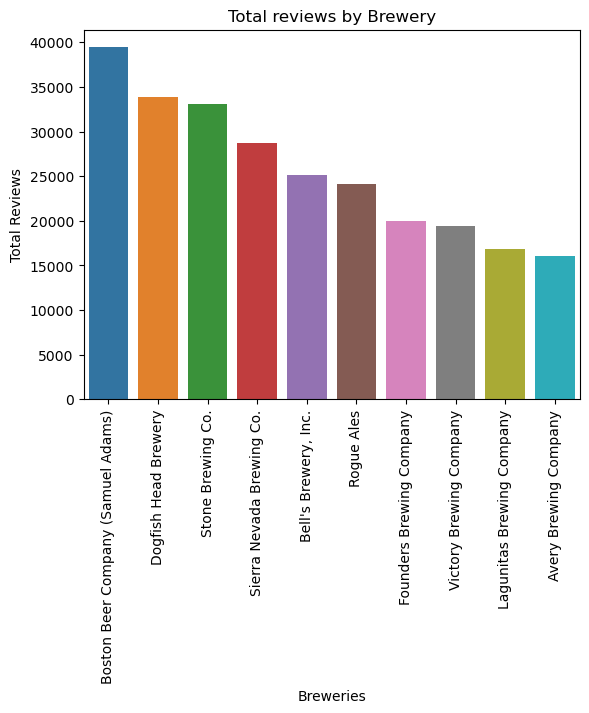

In [14]:
result = duckdb.sql("""SELECT DISTINCT brewery_name, COUNT(*) total_reviews
           FROM df
           GROUP BY brewery_name
           ORDER BY total_reviews DESC
           LIMIT 10""").to_df()

g = sns.barplot(result, x="brewery_name", y="total_reviews")
g.set(xlabel="Breweries", ylabel="Total Reviews", title="Total reviews by Brewery")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql
%sql duckdb://

In [16]:
%%sql --save my_df --no-execute
SELECT DISTINCT brewery_name, COUNT(*) total_reviews
FROM df
GROUP BY brewery_name
ORDER BY total_reviews DESC
LIMIT 10

Running query in 'duckdb://'

Skipping execution...

Plotting using saved snippet : my_df
Removing NULLs, if there exists any from brewery_name and total_reviews


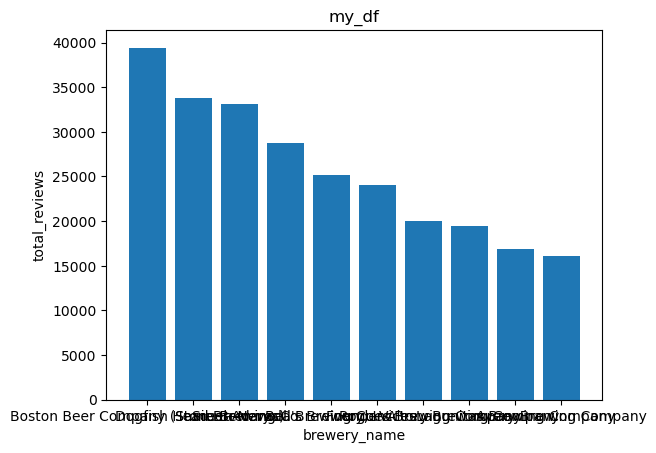

In [17]:
%sqlplot bar --table my_df --column brewery_name total_reviews
plt.show()

Plotting using saved snippet : my_df
Removing NULLs, if there exists any from brewery_name and total_reviews


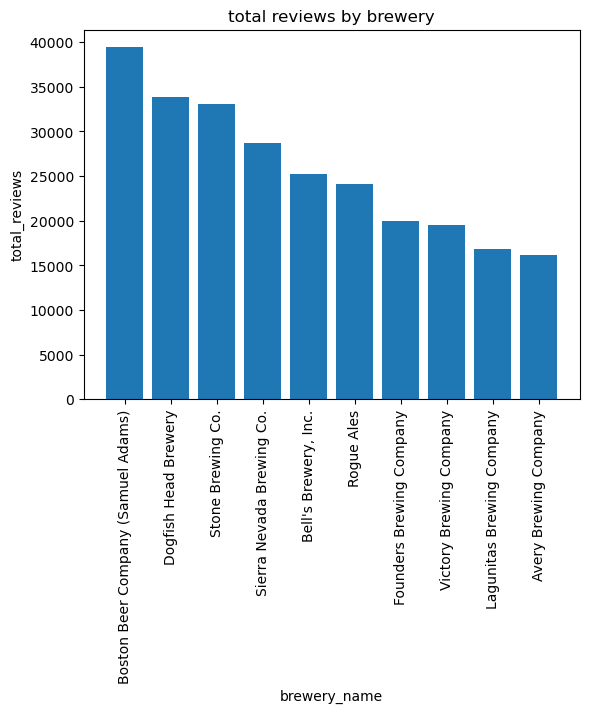

In [18]:
ax = %sqlplot bar --table my_df --column brewery_name total_reviews
ax.set_title("total reviews by brewery")
plt.xticks(rotation=90)
plt.show()